In [14]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

#gensim
import gensim
import gensim.corpora as corpora
from gensim.models import LdaSeqModel
from gensim.models import CoherenceModel

## 특허 데이터 불러오기

In [3]:
df=pd.read_excel('특허_명사_수정.xlsx',index_col=0)
df

,출원번호,출원일자,발명의 명칭,출원인,요약,year,nouns
0,10-2015-0062820,2015.05.05,압력가압수단에 의해 원터치 방식으로 망체를 창틀프레임에 고정시키는 방법 및 이를 이...,주식회사 에스지텍(대전광역시 중구...),본 발명은 압력가압수단에 의해 편리하게 망체가 결합되는 방범창 및 이를 이용한 망체...,2015,"['압력', '가압', '수단', '편리', '망체', '결합', '방범', '창'..."
1,10-2015-0045530,2015.03.31,터널 화재진압용 차폐장치(ENCLOSURE APPARATUS FOR FIRE SUP...,창전이앤시 주식회사(경기도 용인시 수지구...),"본 발명은, 터널의 환기작동을 행할 수 있어 터널의 유지관리를 효과적으로 행할 수 ...",2015,"['터널', '환기', '작동', '터널', '유지', '관리', '효과', '화재..."
2,10-2015-0003420,2015.01.09,사다리형 부재 용접장치(Apparatus for Welding Ladder type...,(주)마스타에프에이(광주광역시 광산구...),"본 발명은 사다리형 부재 용접장치에 관한 것이다. 이를 위해, 본 발명은 장축부재와...",2015,"['사다리', '용접', '장치', '장축', '단축', '사다리', '형태', '..."
3,10-2014-7020640,2013.01.29,이동가능한 재배치층을 이용하여 재배치된 웨이퍼의 제조방법(METHOD FOR MAK...,"엘3해리스 테크놀러지스, 인크.(미합중국 플로리다 ***** 멜보른 웨스트 나사 블...",본 발명은 복수의 전자 디바이스를 갖는 웨이퍼를 제공하는 단계를 포함하는 재배치된 ...,2015,"['전자', '디바이스', '웨이퍼', '배치', '전자', '디바이스', '제조'..."
4,10-2014-0180930,2014.12.16,도로 절단장치(Pavement cutting apparatus),주식회사 한라기계상사(경기도 광주시...),"본 발명은 도로 절단장치에 관한 것으로, 특히 도로의 절단시 발생하는 분진의 비산을...",2015,"['도로', '절단', '장치', '도로', '절단', '분진', '산', '방지'..."
...,...,...,...,...,...,...,...
886173,10-2020-7021005,2018.02.13,성형면 패스너 및 성형면 패스너의 제조 방법(MOLDED HOOK-AND-LOOP ...,와이케이케이 가부시끼가이샤(일본 도꾜도 지요다꾸 간다 이즈미쪼 *반지),"본 발명의 성형면 패스너는, 기부(11, 81)와, 기부(11, 81)의 상면에 길...",2022,"['성형', '면', '패스', '기부', '기부', '상면', '길', '방향',..."
886174,10-2021-0174947,2021.12.08,방수 투습 기능성 앞치마(MOISTURE-PERMEABLE MOISTURE-PROO...,이성근(경기도 포천시...),"본 발명은 방수 투습 기능성 앞치마에 관한 것으로, 보다 상세하게는 상부 방향으로 ...",2022,"['방수', '투습', '기능', '앞치마', '상부', '방향', '형성', '목..."
886175,10-2020-7019455,2018.12.12,핸들 어셈블리 및 이를 포함하는 스테이플러(HANDLE ASSEMBLY AND ST...,"터치스톤 인터내셔널 메디컬 사이언스 씨오., 엘티디.(중국 지앙수 ****** 쑤저...",본 발명은 핸들 어셈블리 및 이를 포함하는 스테이플러를 제공한다. 상기 핸들 어셈블...,2022,"['핸들', '어셈블리', '스테이플러', '핸들', '어셈블리', '핸들', '핸..."
886176,10-2021-0167127,2021.11.29,자동 채수기(Automatic water sampler),이정원(경상남도 통영시...)|허세민(경상남도 김해시...)|윤준호(경상남도 창원시...,"본 발명은 자동 채수기에 관한 것으로, 내부에 유체를 저장하는 유체 저장부가 형성되...",2022,"['자동', '채수기', '내부', '유체', '저장', '유체', '장부', '형..."


In [4]:
df['nouns']

0         ['압력', '가압', '수단', '편리', '망체', '결합', '방범', '창'...
1         ['터널', '환기', '작동', '터널', '유지', '관리', '효과', '화재...
2         ['사다리', '용접', '장치', '장축', '단축', '사다리', '형태', '...
3         ['전자', '디바이스', '웨이퍼', '배치', '전자', '디바이스', '제조'...
4         ['도로', '절단', '장치', '도로', '절단', '분진', '산', '방지'...
                                ...                        
886173    ['성형', '면', '패스', '기부', '기부', '상면', '길', '방향',...
886174    ['방수', '투습', '기능', '앞치마', '상부', '방향', '형성', '목...
886175    ['핸들', '어셈블리', '스테이플러', '핸들', '어셈블리', '핸들', '핸...
886176    ['자동', '채수기', '내부', '유체', '저장', '유체', '장부', '형...
886177    ['접', '동부', '이물질', '억제', '실', '링', '외주', '면', ...
Name: nouns, Length: 886178, dtype: object

In [5]:
#명사 추출 행 문자열 리스트 변환
nouns_list=[]
for data in df['nouns']:
    result=data[1:-1].replace("'","").replace(" ","").split(",")
    nouns_list.append(result)

df['nouns_list']=nouns_list

In [6]:
df['nouns_list']

0         [압력, 가압, 수단, 편리, 망체, 결합, 방범, 창, 망체, 창틀, 프레임, 고...
1         [터널, 환기, 작동, 터널, 유지, 관리, 효과, 화재, 가스, 화염, 확산, 방...
2         [사다리, 용접, 장치, 장축, 단축, 사다리, 형태, 장축, 단축, 용접, 용접,...
3         [전자, 디바이스, 웨이퍼, 배치, 전자, 디바이스, 제조, 각각, 전자, 디바이스...
4         [도로, 절단, 장치, 도로, 절단, 분진, 산, 방지, 절단, 칼날, 열, 분사,...
                                ...                        
886173    [성형, 면, 패스, 기부, 기부, 상면, 길, 방향, 배치, 좌우, 외벽, 부, ...
886174    [방수, 투습, 기능, 앞치마, 상부, 방향, 형성, 목, 삽입, 부, 목, 삽입,...
886175    [핸들, 어셈블리, 스테이플러, 핸들, 어셈블리, 핸들, 핸들, 을, 핸들, 핸들,...
886176    [자동, 채수기, 내부, 유체, 저장, 유체, 장부, 형성, 외주, 둘레, 유체, ...
886177    [접, 동부, 이물질, 억제, 실, 링, 외주, 면, 둘레, 방향, 신장, 쌍, 부...
Name: nouns_list, Length: 886178, dtype: object

In [7]:
# 토픽 모델링에 활용할 시계열 메타변수(time_slice) 컬럼 만들기
df['t'] = df['year']-2015
df['t']

0         0
1         0
2         0
3         0
4         0
         ..
886173    7
886174    7
886175    7
886176    7
886177    7
Name: t, Length: 886178, dtype: int64

## 모델링

#### gensim.models.Phrases 모델
#### 파라미터
- min_count: 최소한 min_count보다 많이 등장한 token들에 대해서 bi-gram 생성
- threshold: default = 10.0, 이 값이 작을수록 두 token을 붙여서 새로운 token으로 만드는 경향이 높아진다.

In [8]:
df_words=pd.read_excel('단어_수정.xlsx')
df_words

,COUNT_단어,COUNT,TF-IDF_단어,TF-IDF
0,장치,684365,장치,21519.747346
1,형성,621920,형성,21161.561510
2,연결,368360,제조,16128.367541
3,정보,355343,정보,14802.210664
4,제어,328834,연결,14068.334483
...,...,...,...,...
3159,장치 제시,1597,유입 입구,171.052202
3160,효과 기대,1592,제어 컨트롤러,169.266754
3161,효과 제거,1575,하부 하부,168.504765
3162,안정 확보,1570,고정 하부,162.976435


In [9]:
words=df_words['COUNT_단어'].to_list()

In [10]:
#1500개 이상의 문서에서 등장한 단어 추출
data_words = df['nouns_list'].to_list()
words_use=[]
for doc in data_words:
    result=[word for word in doc if word in words]
    words_use.append(result)
    
print(words_use[0])

['압력', '가압', '수단', '편리', '결합', '프레임', '고정', '프레임', '위치', '볼트', '프레임', '고정', '공정', '시간', '상승', '상승', '문제점', '개선', '압력', '가압', '수단', '편리', '프레임', '결합', '고정', '압력', '가압', '수단', '편리', '결합', '프레임', '고정']


## 최적의 주제 개수 파악

In [11]:
#딕셔너리 만들기
dictionary = corpora.Dictionary(words_use)
corpus = [dictionary.doc2bow(text) for text in words_use]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(14, 3), (15, 1), (16, 4), (17, 1), (18, 2), (19, 2), (20, 1), (21, 2), (22, 1), (23, 1), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 3), (31, 2), (32, 2), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 2), (39, 2), (40, 1), (41, 2), (42, 1), (43, 1), (44, 2), (45, 12), (46, 2), (47, 2), (48, 4), (49, 1), (50, 2), (51, 1), (52, 1), (53, 2)]


In [12]:
values=[]
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=dictionary)
    coherence = CoherenceModel(model=ldamodel,texts=words_use,dictionary=dictionary,topn=10)
    value = coherence.get_coherence()
    values.append(value)

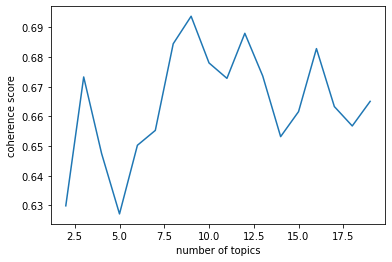

In [15]:
x=range(2,20)
plt.plot(x,values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

## DTM모델링

In [65]:
def prepare_DTM(df,min_count,threshold):
    time_slice = df['nouns_list'].groupby(df['t']).size()
    data_words = df['nouns_list'].to_list()
    bigram = gensim.models.Phrases(data_words, min_count=min_count,threshold=threshold) #bi-gram을 찾아주는 모델
    bigram_mod =  gensim.models.phrases.Phraser(bigram)
    data_words_bigrams = [bigram_mod[doc] for doc in words_use]
    id2word = corpora.Dictionary(data_words_bigrams) #단어들을 숫자와 매핑
    corpus = [id2word.doc2bow(text) for text in data_words_bigrams] #bi-gram의 단어들을 BoW형태로 변환
    del data_words
    return time_slice, id2word, corpus

In [70]:
# 최소 100회이상 등장한 단어만 bi-gram을 하여 토픽모델링에 활용
time_slice, id2word, corpus = prepare_DTM(df,100,10)

In [71]:
#딕셔너리 단어 개수
print(id2word)

Dictionary<4069 unique tokens: ['가압', '결합', '고정', '공정', '문제점_개선']...>


In [72]:
DTM_8 = LdaSeqModel(corpus=corpus,
                    id2word=id2word,
                    time_slice=time_slice,
                    num_topics=8)

C:\Users\jungy\anaconda3\lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
C:\Users\jungy\anaconda3\lib\site-packages\gensim\models\ldaseqmodel.py:298: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)
C:\Users\jungy\anaconda3\lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
C:\Users\jungy\anaconda3\lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
C:\Users\jungy\anaconda3\lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * t

In [80]:
#결과 확인
DTM_8.print_topics(top_terms=20)

[[('제조', 0.04176383002555557),
  ('함유', 0.013540705180810433),
  ('화합물', 0.013350685683290307),
  ('우수', 0.011929115361473706),
  ('반응', 0.010975739541246967),
  ('효과', 0.010885779107118687),
  ('물질', 0.010833225451922278),
  ('혼합', 0.010461381825645603),
  ('중량', 0.008954154945077472),
  ('수지', 0.008383294886587794),
  ('공정', 0.007664665239570374),
  ('성분', 0.007628947989721859),
  ('입자', 0.007365905335798417),
  ('분말', 0.007082360555971503),
  ('활성', 0.0064925305036801),
  ('코팅', 0.006377810406297044),
  ('촉매', 0.006287454215832435),
  ('금속', 0.0059462029550461344),
  ('섬유', 0.005864357769408741),
  ('용액', 0.005468204771197333)],
 [('측정', 0.027213059844549938),
  ('영상', 0.026567593412174496),
  ('신호', 0.025844200089571622),
  ('센서', 0.024022067623364205),
  ('장치', 0.021440367892532876),
  ('검출', 0.017885968665952427),
  ('감지', 0.016207680508812602),
  ('정보', 0.015379001414273707),
  ('데이터', 0.015191559404836377),
  ('위치', 0.01393348533248523),
  ('제어', 0.013791043109668867),
  ('이미지'

In [76]:
# 모델 저장
DTM_8.save("DTM_8.model")